# Exercice : générer un échantillon de copule gaussienne et de marginale exponentielle - Solution

In [1]:
import openturns as ot
import numpy as np

## Partie 1 : avec un algorithme

On commence par créer la moyenne, la matrice de covariance et la variable gaussienne.

In [2]:
dim = 2
mu = [0.]*dim

In [3]:
Sigma = ot.CovarianceMatrix(dim, [2.,1.,1.,4.])
Sigma

class=CovarianceMatrix dimension=2 implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[2,1,1,4]

In [4]:
n = ot.Normal(mu, Sigma)

Puis on génère un échantillon de taille 500, que l'on visualise.

In [5]:
sampleSize = 500
y = n.getSample(sampleSize)
y.setDescription(["Y0","Y1"])

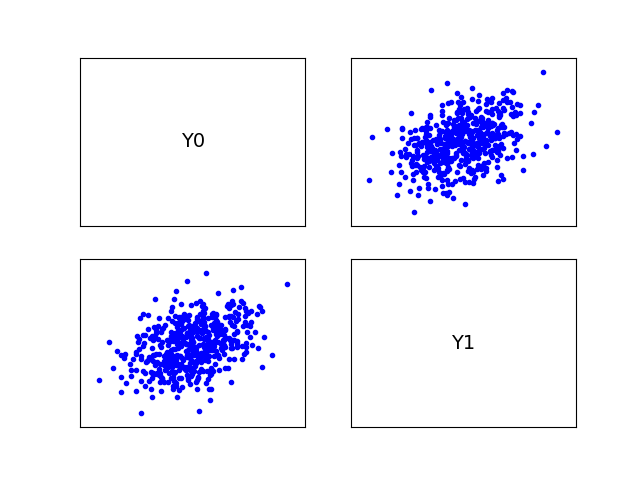

In [6]:
def plotPairs(sample):
    graph = ot.Graph("", "", "", True, "")
    labels = sample.getDescription()
    pairs = ot.Pairs(sample, "", labels, "blue", "bullet")
    graph.add(pairs)
    return graph
plotPairs(y)

On utilise l'équation (1) pour générer l'échantillon `u` de lois marginales uniformes. La fonction `pNormal` évalue la fonction de répartition de la loi gaussienne standard $\Phi$.

In [7]:
u = ot.Sample(sampleSize,dim)
u.setDescription(["U0","U1"])
for i in range(dim):
    for j in range(sampleSize):
        u[j,i] = ot.DistFunc.pNormal(y[j,i]/np.sqrt(Sigma[i,i]))

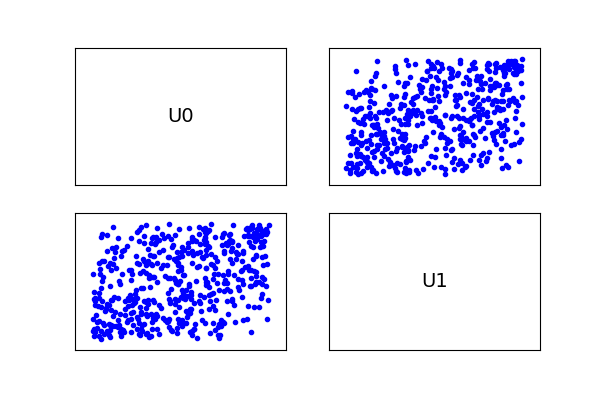

In [8]:
plotPairs(u)

On utilise l'équation (2) pour générer l'échantillon `x` de lois marginales exponentielles. On utilise la fonction `log1p` qui est plus précise lorsque l'argument d'entrée est proche de zéro. 

In [9]:
x = ot.Sample(sampleSize,dim)
x.setDescription(["X0","X1"])
x.setName("Generated")
for i in range(dim):
    for j in range(sampleSize):
        x[j,i] = -np.log1p(-u[j,i])

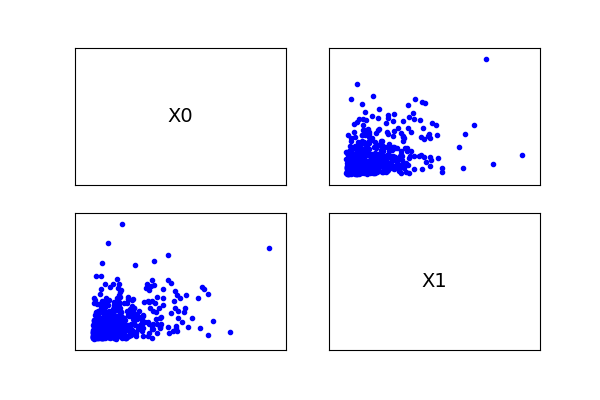

In [10]:
plotPairs(x)

On observe une plus grande densité de points en bas à gauche. 

On vérifie la loi marginale de l'échantillon en comparant son histogramme empirique et la PDF de la loi exponentielle.

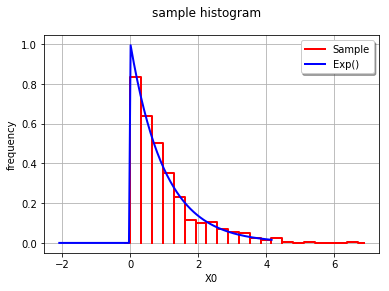

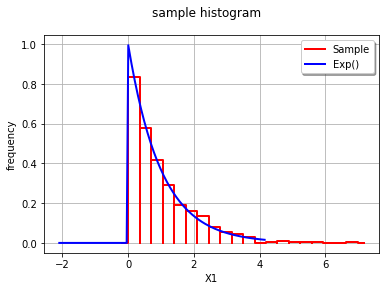

In [11]:
import openturns.viewer
for i in range(dim):
    graph = ot.HistogramFactory().build(x[:,i]).drawPDF()
    graph.setLegends(["Sample"])
    graph.setXTitle("X%d" % (i))
    gE = ot.Exponential().drawPDF()
    gE.setColors(["blue"])
    gE.setLegends(["Exp()"])
    graph.add(gE)
    ot.viewer.View(graph)

On observe que l'histogramme empirique est très proche de la densité de probabilité de la loi exponentielle. 

On vérifie la dépendance en dessinant la copule empirique.

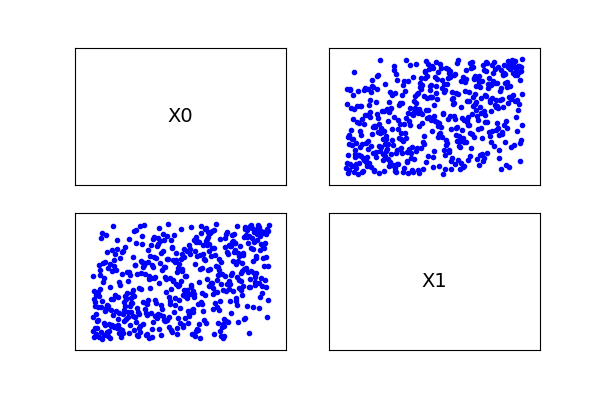

In [12]:
plotPairs(x.rank())

On observe qu'il y a plus de points en bas à gauche et en haut à droite et moins en haut à gauche et en bas à droite. Cela implique que le nuage de points est associé à une structure de dépendance (i.e. les marginales ne sont pas indépendantes). 

## Partie 2 : avec NormalCopula

In [13]:
R = n.getCorrelation()
R

class=CorrelationMatrix dimension=2 implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[1,0.353553,0.353553,1]

In [14]:
c = ot.NormalCopula(R)

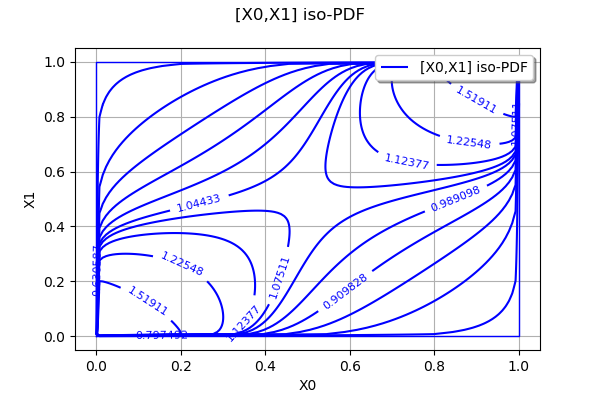

In [15]:
c.drawPDF()

On observe que la densité de copule correspond exactement au nuage de points dans l'espace des rangs que nous avons observé dans une cellule précédente. Cela confirme que la copule gaussienne a été correctement prise en compte dans notre algorithme de génération de l'échantillon. 

In [16]:
e = [ot.Exponential()]*dim
e

[class=Exponential name=Exponential dimension=1 lambda=1 gamma=0,
 class=Exponential name=Exponential dimension=1 lambda=1 gamma=0]

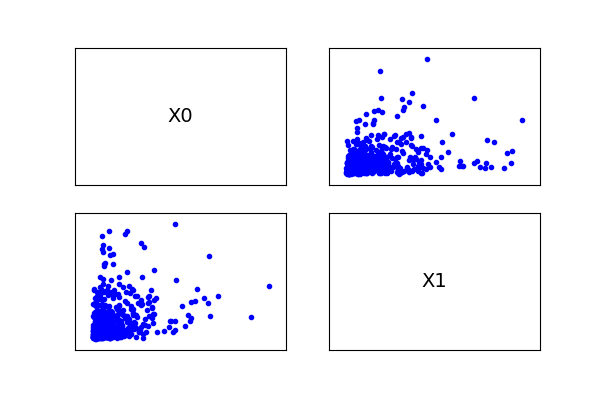

In [17]:
cod = ot.ComposedDistribution(e,c)
samplex = cod.getSample(sampleSize)
plotPairs(samplex)

On observe une plus grande densité de points en bas à gauche, comme nous l'avions déjà observé dans une cellule précédente. 

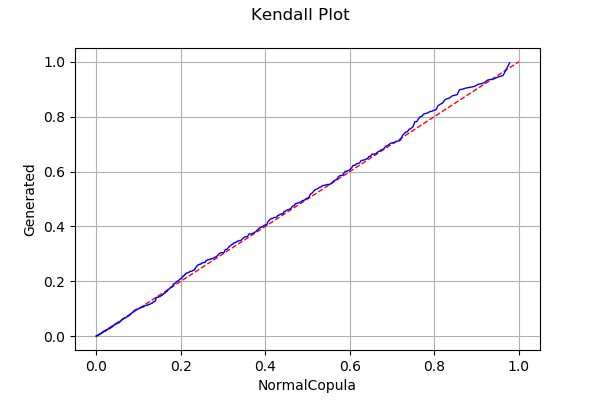

In [18]:
ot.VisualTest_DrawKendallPlot(x,c)

On observe que les points sont situés sur la première bissectrice, ce qui implique que les valeurs de la fonction de répartition de l'échantillon correspondent aux valeurs de la copule gaussienne. Cela confirme que la dépendance de l'échantillon est effectivement associé à une copule gaussienne.